# 1. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# 2. Data Cleaning & Preparation

In [2]:
summer = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/winter.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/eozhisarcikli/olympic-game-analysis/main/data/dictionary.csv")

### 2.1 Countries Data Set

In [3]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [4]:
#view the summary of the data
print ("Rows   :" , countries.shape[0])
print ("Columns:" , countries.shape[1])
print ("\nColumn Names:\n" , countries.columns.tolist())
print ("\nColumns Data Types:\n", countries.dtypes)
print ("\nMissing values:\n", countries.isnull().sum().values.sum())
print ("\nUnique values:\n", countries.nunique())

Rows   : 201
Columns: 4

Column Names:
 ['Country', 'Code', 'Population', 'GDP per Capita']

Columns Data Types:
 Country            object
Code               object
Population        float64
GDP per Capita    float64
dtype: object

Missing values:
 30

Unique values:
 Country           201
Code              201
Population        196
GDP per Capita    176
dtype: int64


In [5]:
#check for null values
countries.isnull().sum()

Country            0
Code               0
Population         5
GDP per Capita    25
dtype: int64

### 2.2 Summer Data Set

In [6]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
#statistics on numeric columns
summer.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [8]:
#view the summary of the data
print ("Rows   :" , summer.shape[0])
print ("Columns:" , summer.shape[1])
print ("\nColumn Names:\n" , summer.columns.tolist())
print ("\nColumns Data Types:\n", summer.dtypes)
print ("\nMissing values:\n", summer.isnull().sum().values.sum())
print ("\nUnique values:\n", summer.nunique())

Rows   : 31165
Columns: 9

Column Names:
 ['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender', 'Event', 'Medal']

Columns Data Types:
 Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

Missing values:
 4

Unique values:
 Year             27
City             22
Sport            43
Discipline       67
Athlete       22762
Country         147
Gender            2
Event           666
Medal             3
dtype: int64


In [9]:
#check for null values
summer.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [10]:
#lets see how these records with missing Country look
summer.loc[summer['Country'].isna()].head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [11]:
#'Pending' doesn't look like an athlete, lets check if there are more
summer.loc[summer['Athlete']=='Pending'].head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver


In [12]:
#clean and recheck null values
print ("number of records and shape before dropping missing values   : " , summer.shape)
summer=summer.dropna(subset=['Country'])
print ("\n recheck for null values                                   : \n", summer.isnull().sum())
print ("\nnumber of records and shape after dropping missing values  : " , summer.shape)

number of records and shape before dropping missing values   :  (31165, 9)

 recheck for null values                                   : 
 Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

number of records and shape after dropping missing values  :  (31161, 9)


In [13]:
#merge country names
summer=summer.merge(countries,left_on='Country',right_on='Code',how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [14]:
#reorganize Athlete names
summer['Athlete']=summer['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


### 2.3 Winter Data Set

In [15]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [16]:
#statistics on numeric columns
winter.describe()

,Year
count,5770.000000
mean,1986.350433
std,24.263673
min,1924.000000
25%,1972.000000
50%,1994.000000
75%,2006.000000
max,2014.000000


In [17]:
#view the summary of the data
print ("Rows   :" , winter.shape[0])
print ("Columns:" , winter.shape[1])
print ("\nColumn Names:\n" , winter.columns.tolist())
print ("\nColumns Data Types:\n", winter.dtypes)
print ("\nMissing values:\n", winter.isnull().sum().values.sum())
print ("\nUnique values:\n", winter.nunique())

Rows   : 5770
Columns: 9

Column Names:
 ['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender', 'Event', 'Medal']

Columns Data Types:
 Year           int64
City          object
Sport         object
Discipline    object
Athlete       object
Country       object
Gender        object
Event         object
Medal         object
dtype: object

Missing values:
 0

Unique values:
 Year            22
City            19
Sport            7
Discipline      15
Athlete       3761
Country         45
Gender           2
Event           83
Medal            3
dtype: int64


In [18]:
#merge country names
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [19]:
#reorganize Athlete names
winter['Athlete']=winter['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze,France
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze,France
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze,France
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze,France
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold,Switzerland


# 3. Analysis

## 3.1 Summer Olympics

### 3.1.1 Graph by Years and Country

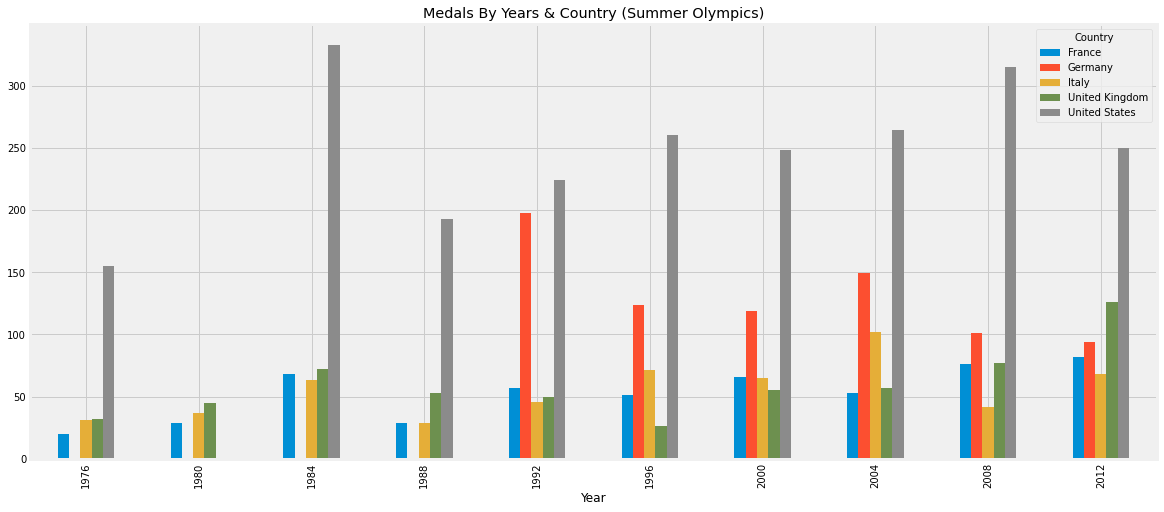

In [20]:
summer_graph_years_list=summer['Year'].unique()[-10:].tolist()
summer_graph_years=summer.groupby(['Country','Year'])['Medal'].count().reset_index()
summer_graph_years=summer_graph_years[summer_graph_years['Country'].isin(summer['Country'].value_counts()[:5].index)]
summer_graph_years=summer_graph_years[summer_graph_years['Year'].isin(summer_graph_years_list)]
summer_graph_years=summer_graph_years.pivot('Year','Country','Medal')
summer_graph_years.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years & Country (Summer Olympics)')
plt.show()

### 3.1.2 Heatmap by Discipline and Country

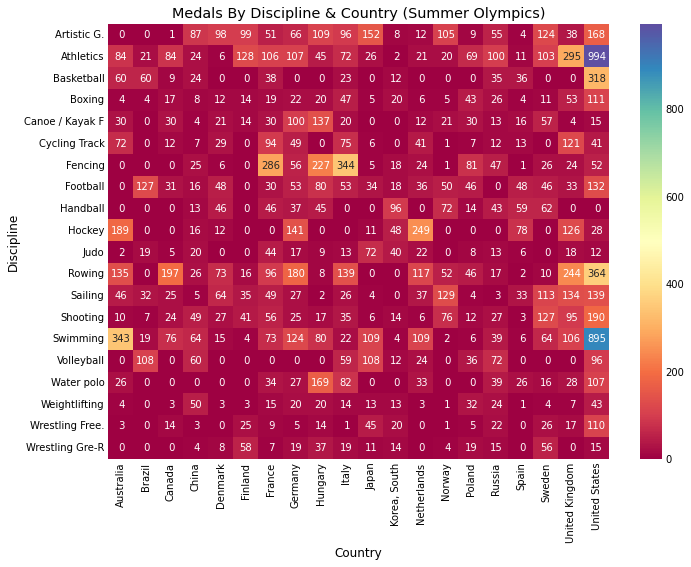

In [21]:
#getting a list of the countries with the most medals 
summer_heatmap_country_list=summer.groupby(['Country'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)[:20]
summer_heatmap_country_list=summer_heatmap_country_list['Country']

#getting a list of the disciplines with the most medals 
summer_heatmap_discipline_list=summer.groupby(['Discipline'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)[:20]
summer_heatmap_discipline_list=summer_heatmap_discipline_list['Discipline']

#heatmap graph
summer_heatmap=summer[summer['Country'].isin(summer_heatmap_country_list)]
summer_heatmap=summer_heatmap[summer_heatmap['Discipline'].isin(summer_heatmap_discipline_list)]
summer_heatmap=summer_heatmap.groupby(['Country','Discipline'])['Athlete'].count().reset_index()
summer_heatmap=summer_heatmap.pivot('Discipline','Country','Athlete').fillna(0)
sns.heatmap(summer_heatmap,cmap='Spectral',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Medals By Discipline & Country (Summer Olympics)')
plt.show()

### 3.1.3 Medals by Athlete

In [22]:
medals_summer = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals_summer.head()

,Athlete,Medal,Sport
17343,Michael Phelps,Gold,18
19223,Paavo Nurmi,Gold,9
16580,Mark Spitz,Gold,9
3516,Carl Lewis,Gold,9
14730,Larisa Latynina,Gold,9


In [23]:
medals_summer = medals_summer.drop_duplicates(subset=['Medal'],keep='first')
medals_summer

,Athlete,Medal,Sport
17343,Michael Phelps,Gold,18
587,Aleksandr Dityatin,Silver,6
9797,Heikki Savolainen,Bronze,6


In [24]:
male_most_medals_summer = summer[summer['Gender']=='Men']['Athlete'].value_counts().index[0]
male_medals_summer = summer[summer['Gender']=='Men']['Athlete'].value_counts().values[0]
female_most_medals_summer = summer[summer['Gender']=='Women']['Athlete'].value_counts().index[0]
female_medals_summer = summer[summer['Gender']=='Women']['Athlete'].value_counts().values[0]

print('The Highest Decorated Male Athlete is',male_most_medals_summer,'with',male_medals_summer,'medals')
print('The Highest Decorated Female Athlete is',female_most_medals_summer,'with',female_medals_summer,'medals')

The Highest Decorated Male Athlete is Michael Phelps with 22 medals
The Highest Decorated Female Athlete is Larisa Latynina with 18 medals


### 3.1.4 Medals by Country

In [25]:
medals_country_summer = summer.groupby(['Country','Medal'])['Athlete'].count().reset_index()
medals_country_summer = medals_country_summer.pivot('Country','Medal','Athlete').fillna(0)
medals_country_summer.head()

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0


In [26]:
top_summer = medals_country_summer.sort_values(['Gold','Silver','Bronze'],ascending=False)[:10]
top_summer

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


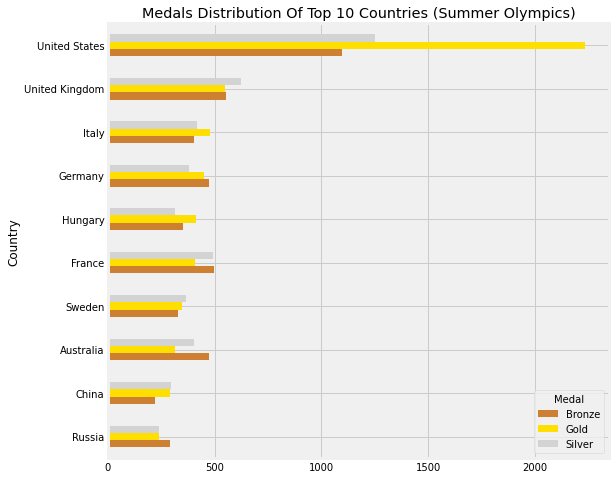

In [27]:
top_summer = top_summer.sort_values(['Gold','Silver','Bronze'],ascending=True)
top_summer.plot.barh(width=0.5,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

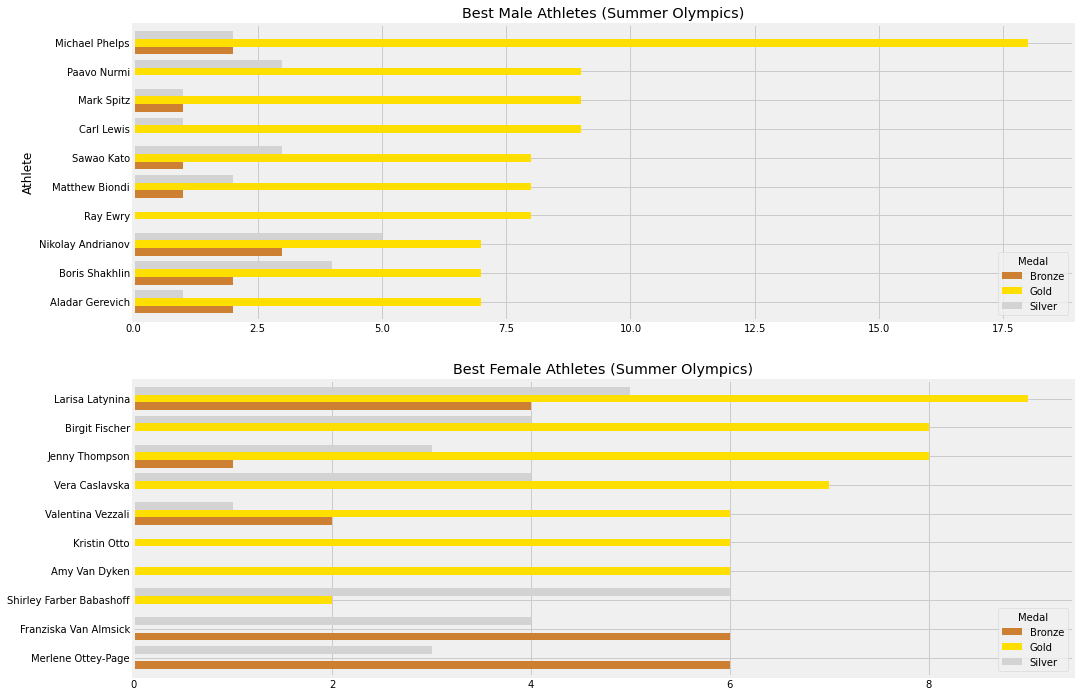

In [28]:
fig,ax=plt.subplots(2,1,figsize=(15,12))
men_summer=summer[summer['Gender']=='Men']
men_summer=men_summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
men_summer_top_list=men_summer['Athlete'][:10]
men_summer=men_summer[men_summer['Athlete'].isin(men_summer_top_list)]
men_summer=men_summer.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
men_summer.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes (Summer Olympics)')
ax[0].set_ylabel('Athlete')

women_summer=summer[summer['Gender']=='Women']
women_summer=women_summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
women_summer_top_list=women_summer['Athlete'][:10]
women_summer=women_summer[women_summer['Athlete'].isin(women_summer_top_list)]
women_summer=women_summer.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
women_summer.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes (Summer Olympics)')
ax[1].set_ylabel('')
plt.show()

## 3.2 Winter Olympics

### 3.2.1 Line Graph by Years and Country

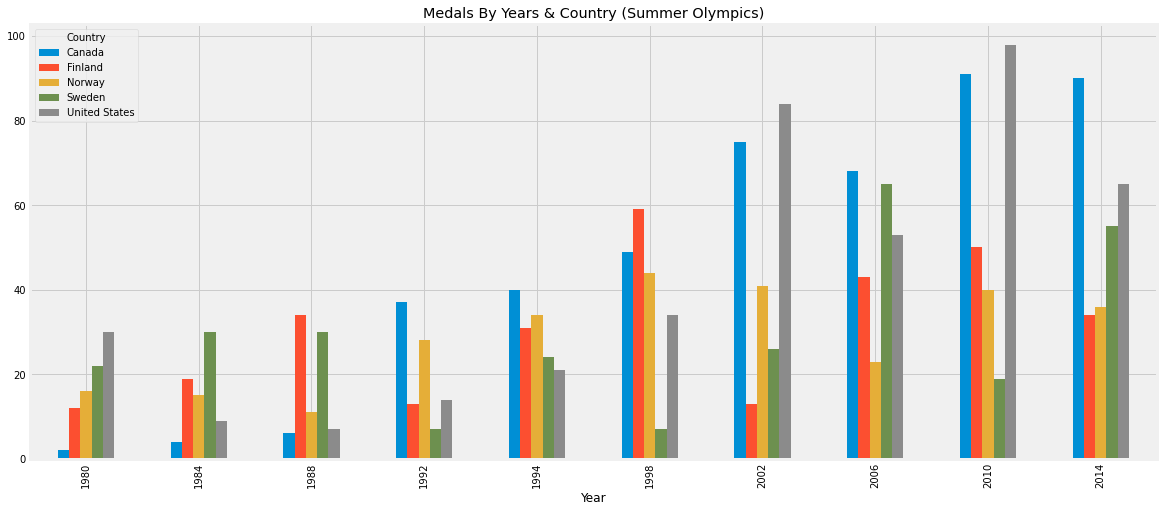

In [29]:
winter_graph_years_list=winter['Year'].unique()[-10:].tolist()
winter_graph_years=winter.groupby(['Country','Year'])['Medal'].count().reset_index()
winter_graph_years=winter_graph_years[winter_graph_years['Country'].isin(winter['Country'].value_counts()[:5].index)]
winter_graph_years=winter_graph_years[winter_graph_years['Year'].isin(winter_graph_years_list)]
winter_graph_years=winter_graph_years.pivot('Year','Country','Medal')
winter_graph_years.plot(kind='bar')
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years & Country (Summer Olympics)')
plt.show()

### 3.2.2 Heatmap by Discipline and Country

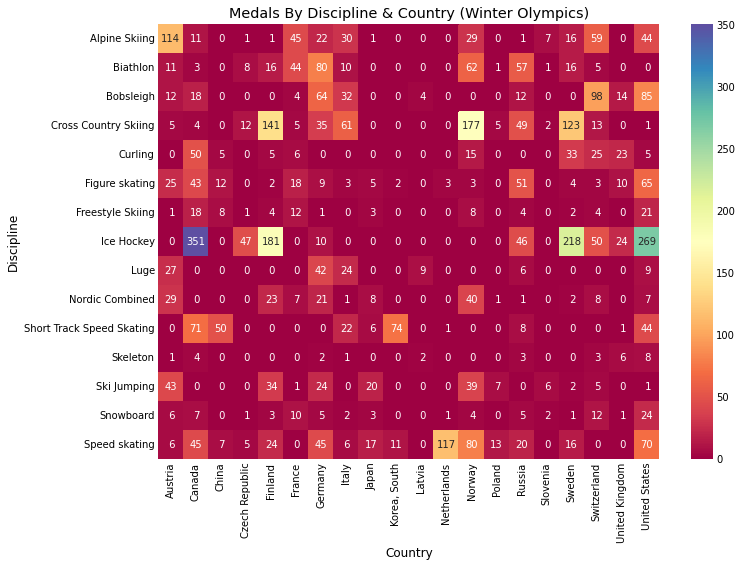

In [30]:
#getting a list of the countries with the most medals 
winter_heatmap_country_list=winter.groupby(['Country'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)[:20]
winter_heatmap_country_list=winter_heatmap_country_list['Country']

#getting a list of the disciplines with the most medals 
winter_heatmap_discipline_list=winter.groupby(['Discipline'])['Medal'].count().reset_index().sort_values(by='Medal',ascending=False)[:20]
winter_heatmap_discipline_list=winter_heatmap_discipline_list['Discipline']

#heatmap graph
winter_heatmap=winter[winter['Country'].isin(winter_heatmap_country_list)]
winter_heatmap=winter_heatmap[winter_heatmap['Discipline'].isin(winter_heatmap_discipline_list)]
winter_heatmap=winter_heatmap.groupby(['Country','Discipline'])['Athlete'].count().reset_index()
winter_heatmap=winter_heatmap.pivot('Discipline','Country','Athlete').fillna(0)
sns.heatmap(winter_heatmap,cmap='Spectral',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Medals By Discipline & Country (Winter Olympics)')
plt.show()

### 3.2.3 Medals by Athlete

In [31]:
medals_winter = winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals_winter.head()

,Athlete,Medal,Sport
569,Björn Daehlie,Gold,8
3303,Ole Einar Bjoerndalen,Gold,8
1655,Harri Kirvesniemi,Bronze,6
2841,Marit Bjoergen,Gold,6
2658,Ljubov Egorova,Gold,6


In [32]:
medals_winter = medals_winter.drop_duplicates(subset=['Medal'],keep='first')
medals_winter

,Athlete,Medal,Sport
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [33]:
male_most_medals_winter = winter[winter['Gender']=='Men']['Athlete'].value_counts().index[0]
male_medals_winter = winter[winter['Gender']=='Men']['Athlete'].value_counts().values[0]
female_most_medals_winter = winter[winter['Gender']=='Women']['Athlete'].value_counts().index[0]
female_medals_winter = winter[winter['Gender']=='Women']['Athlete'].value_counts().values[0]

print('The Highest Decorated Male Athlete is',male_most_medals_winter,'with',male_medals_winter,'medals')
print('The Highest Decorated Female Athlete is',female_most_medals_winter,'with',female_medals_winter,'medals')

The Highest Decorated Male Athlete is Ole Einar Bjoerndalen with 13 medals
The Highest Decorated Female Athlete is Stefania Belmondo with 10 medals


### 3.2.4 Medals by Country

In [34]:
medals_country_winter = winter.groupby(['Country','Medal'])['Athlete'].count().reset_index()
medals_country_winter = medals_country_winter.pivot('Country','Medal','Athlete').fillna(0)
medals_country_winter.head()

Medal,Bronze,Gold,Silver
Country,,,
Australia,7.0,5.0,3.0
Austria,103.0,79.0,98.0
Belarus,5.0,6.0,4.0
Belgium,7.0,2.0,4.0
Bulgaria,3.0,1.0,2.0


In [35]:
top_winter = medals_country_winter.sort_values(['Gold','Silver','Bronze'],ascending=False)[:10]
top_winter

Medal,Bronze,Gold,Silver
Country,,,
Canada,107.0,315.0,203.0
United States,167.0,167.0,319.0
Norway,127.0,159.0,171.0
Germany,97.0,137.0,126.0
Sweden,177.0,127.0,129.0
Russia,79.0,94.0,90.0
Austria,103.0,79.0,98.0
Switzerland,132.0,76.0,77.0
Finland,221.0,66.0,147.0


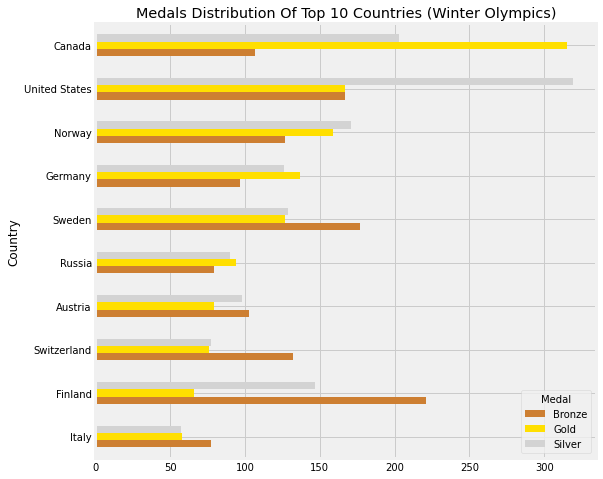

In [36]:
top_winter = top_winter.sort_values(['Gold','Silver','Bronze'],ascending=True)
top_winter.plot.barh(width=0.5,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

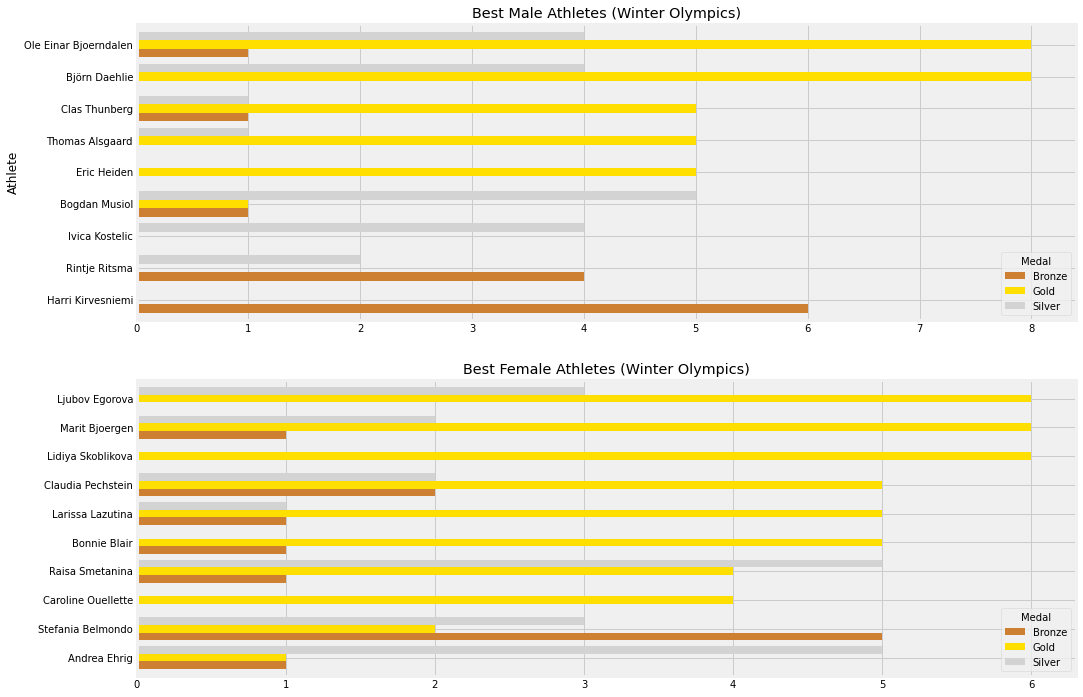

In [37]:
fig,ax=plt.subplots(2,1,figsize=(15,12))
men_winter=winter[winter['Gender']=='Men']
men_winter=men_winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
men_winter_top_list=men_winter['Athlete'][:10]
men_winter=men_winter[men_winter['Athlete'].isin(men_winter_top_list)]
men_winter=men_winter.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
men_winter.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes (Winter Olympics)')
ax[0].set_ylabel('Athlete')

women_winter=winter[winter['Gender']=='Women']
women_winter=women_winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
women_winter_top_list=women_winter['Athlete'][:10]
women_winter=women_winter[women_winter['Athlete'].isin(women_winter_top_list)]
women_winter=women_winter.pivot('Athlete','Medal','Sport').fillna(0).sort_values(['Gold','Silver','Bronze'],ascending=True)
women_winter.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes (Winter Olympics)')
ax[1].set_ylabel('')
plt.show()